In [85]:
import pandas as pd
import numpy as np
import config
import json
import requests

import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as pyo
import plotly.express as px

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")

import fiona
import geopandas as gpd

#from urllib.request import urlopen

import warnings
# warnings.filterwarnings("ignore")

## (1) Import Datasets

In [2]:
data = pd.read_json("https://nycdsacapstone2021.blob.core.windows.net/geojsons/school_districts_simplified.json")

In [3]:
#import geoJSON of school boundaries
gdf = gpd.GeoDataFrame.from_features(data["features"])
gdf.head()

,geometry,STATEFP,UNSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,GEO_YEAR,SCHOOLYEAR
0,"POLYGON ((-77.00244 38.96567, -77.11976 38.934...",11,00030,1100030,District of Columbia Public Schools,00,PK,12,G5420,,E,158316124,18709762,+38.9042474,-077.0165167,2021,2020-2021
1,"POLYGON ((-82.65855 29.83014, -82.65630 29.564...",12,00030,1200030,Alachua County School District,00,PK,12,G5420,,E,2267905452,241297386,+29.6757403,-082.3572210,2021,2020-2021
2,"POLYGON ((-82.41891 30.58177, -82.45979 30.584...",12,00060,1200060,Baker County School District,00,PK,12,G5420,,E,1515738971,9686120,+30.3244416,-082.3022838,2021,2020-2021
3,"POLYGON ((-86.00077 30.10360, -85.58962 29.837...",12,00090,1200090,Bay County School District,00,PK,12,G5420,,E,1964874033,1833915193,+30.1373956,-085.6286886,2021,2020-2021
4,"POLYGON ((-82.14258 30.14312, -82.31338 29.954...",12,00120,1200120,Bradford County School District,00,PK,12,G5420,,E,761368537,16898784,+29.9523863,-082.1666983,2021,2020-2021


In [4]:
gdf.to_csv('../../nycdatascience_smh_dash/map_assets/gdf.csv')

In [10]:
#import df school districts demographics
mapping_df = pd.read_csv('../nicole/clean_data/school_districts_greatschools_demographics.csv')
mapping_df['GEOID'] = mapping_df['GEOID'].astype('int')
mapping_df = mapping_df.drop(['first_word'],axis=1).reset_index()

mapping_df

,level_0,Unnamed: 0,index,school_district,avg_rating,total_enrollment,num_schools,avg_pct_low_income,state,school_district_id,GEOID
0,0,0,42,District of Columbia Public Schools,5.7,48218,104,81.2,DC,NaN,1100030
1,1,1,71,Alachua,5.0,29834,60,52.2,FL,Alachua County School District,1200030
2,2,2,312,Baker,5.2,5060,7,33.6,FL,Baker County School District,1200060
3,3,3,97,Bay,4.9,23100,38,58.4,FL,Bay County School District,1200090
4,4,4,26,Brevard,5.8,73331,100,49.7,FL,Brevard County School District,1200150
...,...,...,...,...,...,...,...,...,...,...,...
476,476,476,607,Webster County Schools,4.2,1315,4,69.8,WV,Webster County School District,5401530
477,477,477,476,Wetzel County Schools,4.5,2527,9,53.6,WV,Wetzel County School District,5401560
478,478,478,657,Wirt County Schools,3.0,1010,3,50.7,WV,Wirt County School District,5401590
479,479,479,163,Wood County Schools,6.3,12423,28,52.2,WV,Wood County School District,5401620


In [65]:
#add possible additional columns?
#mapping_df['num_schools_scale']= np.log10(mapping_df['num_schools'])


In [11]:
#import historical transactions
historical = pd.read_csv('https://nycdsacapstone2021.blob.core.windows.net/mapping/historical_cleaned.csv', index_col= 0)
historical.dtypes

SALE TYPE                                                                                       object
SOLD DATE                                                                                       object
PROPERTY TYPE                                                                                   object
ADDRESS                                                                                         object
CITY                                                                                            object
STATE OR PROVINCE                                                                               object
ZIP OR POSTAL CODE                                                                              object
PRICE                                                                                            int64
BEDS                                                                                           float64
BATHS                                                                    

In [75]:
historical.sort_values(by=['PRICE'], ascending=True).head(50)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,STATUS,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),INTERESTED,LATITUDE,LONGITUDE,Year_Sold,Log_price
152863,PAST SALE,2019-09-20,Townhouse,44893 Canvas Back Dr,Callaway,MD,20620,17,4.0,2.5,...,1991,807.0,0.0,Sold,https://www.redfin.com/MD/Callaway/44893-Canva...,Y,38.240848,-76.522652,2019,2.833213
53243,PAST SALE,2019-06-06,Townhouse,315 Maryland Ave,Westernport,MD,21562,40,4.0,1.5,...,1919,913.0,0.0,Sold,https://www.redfin.com/MD/Westernport/315-Mary...,Y,39.481807,-79.042977,2019,3.688879
291575,PAST SALE,2021-11-05,Single Family Residential,979 Bestland Rd,Essex,VA,22454,155,4.0,1.5,...,1973,30.0,0.0,Sold,https://www.redfin.com/VA/Dunnsville/979-Bestl...,Y,37.818376,-76.888684,2021,5.043425
121854,PAST SALE,2021-11-03,Townhouse,3303 Belsford Ct,Baltimore,MD,21222,195,3.0,1.0,...,1957,32.0,0.0,Sold,https://www.redfin.com/MD/Dundalk/3303-Belsfor...,Y,39.278370,-76.481810,2021,5.273000
263525,PAST SALE,2019-08-15,Single Family Residential,6430 Hoover Ln,Bryans Road,MD,20616.0,199,3.0,2.0,...,1952,843.0,0.0,Sold,https://www.redfin.com/MD/Bryans-Road/6430-Hoo...,Y,38.671915,-77.089430,2019,5.293305
298515,PAST SALE,2021-10-01,Condo/Co-op,15710 Dorset Rd #201,Laurel,MD,20707,220,3.0,2.0,...,1982,65.0,0.0,Sold,https://www.redfin.com/MD/Laurel/15710-Dorset-...,Y,39.106416,-76.879449,2021,5.393628
239013,PAST SALE,2019-09-30,Single Family Residential,162 Sandpiper Dr,Montross,VA,22520,230,3.0,2.5,...,2005,797.0,0.0,Sold,https://www.redfin.com/VA/Montross/162-Sandpip...,Y,38.136783,-76.665168,2019,5.438079
250312,PAST SALE,2019-03-07,Single Family Residential,1212 Pine Lane Ln,Accokeek,MD,20607.0,295,4.0,2.0,...,1987,1004.0,0.0,Sold,https://www.redfin.com/MD/Accokeek/1212-Pine-L...,Y,38.660057,-77.031517,2019,5.686975
283927,PAST SALE,2019-07-11,Townhouse,7816 Greenbrook Dr,Greenbelt,MD,20770,302,3.0,3.0,...,1988,878.0,0.0,Sold,https://www.redfin.com/MD/Greenbelt/7816-Green...,Y,38.989341,-76.870862,2019,5.710427
48840,PAST SALE,2019-02-26,Single Family Residential,10005 Madronawood Dr,Laurel,MD,20708,302,5.0,3.0,...,1982,1013.0,0.0,Sold,https://www.redfin.com/MD/Laurel/10005-Madrona...,Y,39.051921,-76.832296,2019,5.710427


# (2) EDA

## Active

In [103]:
data = pd.read_csv('../jack/General/data/redfin_cleaned_stage_1.csv')

/Users/nicole/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [104]:
data.drop(['Unnamed: 0','NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'ZIP OR POSTAL CODE',
       'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
        'SOURCE','FAVORITE','INTERESTED']
       , axis=1, inplace=True)
data.rename(columns={
    'SALE TYPE':'Sale_Type',
    'SOLD DATE':'Sold_Date',
    'PROPERTY TYPE':'Prop_Type',
    'STATE OR PROVINCE':'State', 
    'SQUARE FEET':'SF', 
    'LOT SIZE':'Lot_Size', 
    'YEAR BUILT':'YearBuilt',
    'DAYS ON MARKET':'Days_on_Mkt', 
    '$/SQUARE FEET':'px_perSF', 
    'HOA/MONTH':'HOA_perMonth'
}, inplace=True)

In [105]:
data = data.fillna(0)
data['PRICE'] = data['PRICE'].round(-1).astype('int64')

In [106]:
q_low = data["PRICE"].quantile(0.05)
q_hi  = data["PRICE"].quantile(0.95)

data = data[(data.State!= 'NV') & (data.State!= 'sc') & (data.State!= 'fl') & (data.State!= 'Fl')& (data.State!= 'BI')]
data_filtered = data[(data["PRICE"] < q_hi) & (data["PRICE"] > q_low)]

In [108]:
categorical_df = categorical_df[(categorical_df.State!= 'NV') & (categorical_df.State!= 'sc') & (categorical_df.State!= 'fl') & (categorical_df.State!= 'Fl')& (categorical_df.State!= 'BI')]

<AxesSubplot:xlabel='State', ylabel='Count'>

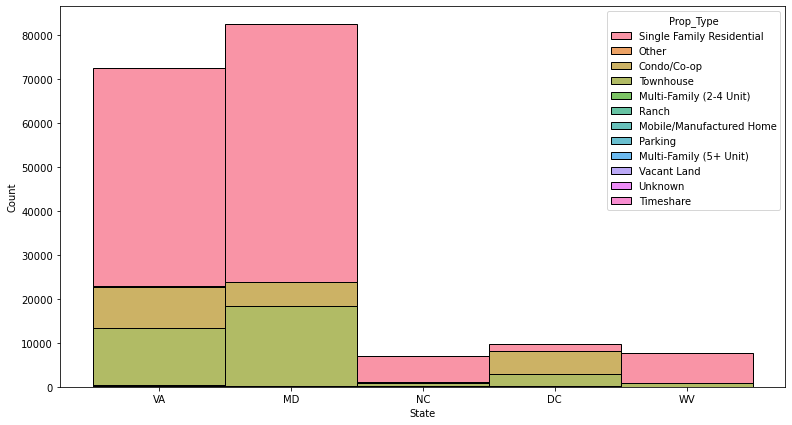

In [109]:
plt.figure(figsize=(13,7))
sns.histplot(categorical_df,x='State', stat='count', hue='Prop_Type', multiple='stack')

<AxesSubplot:xlabel='State', ylabel='PRICE'>

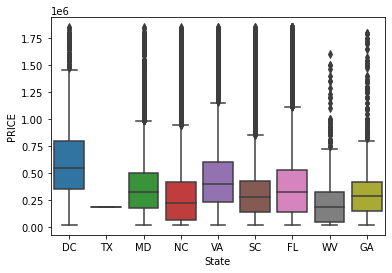

In [110]:
sns.boxplot(x=data_filtered['State'], y=data['PRICE'])

## Historical

In [90]:
historical.rename(columns={
    'SALE TYPE':'Sale_Type',
    'SOLD DATE':'Sold_Date',
    'PROPERTY TYPE':'Prop_Type',
    'STATE OR PROVINCE':'State', 
    'SQUARE FEET':'SF', 
    'LOT SIZE':'Lot_Size', 
    'YEAR BUILT':'YearBuilt',
    'DAYS ON MARKET':'Days_on_Mkt', 
    '$/SQUARE FEET':'px_perSF', 
    'HOA/MONTH':'HOA_perMonth'
}, inplace=True)

In [99]:
q_low = historical["PRICE"].quantile(0.25)
q_hi  = historical["PRICE"].quantile(0.75)

historical = historical[(historical.State!= 'PA') & (historical.State!= 'AR') & (historical.State!= 'NE') & (historical.State!= 'DE')& (historical.State!= 'BI')]
historical_filtered = historical[(historical["PRICE"] < q_hi) & (historical["PRICE"] > q_low)]

In [91]:
categorical = ['object']
categorical_df = historical.select_dtypes(include=categorical)

In [92]:
categorical_df = categorical_df[(categorical_df.State!= 'PA') & (categorical_df.State!= 'AR') & (categorical_df.State!= 'NE') & (categorical_df.State!= 'DE')& (categorical_df.State!= 'BI')]
categorical_df

,Sale_Type,Sold_Date,Prop_Type,ADDRESS,CITY,State,ZIP OR POSTAL CODE,LOCATION,STATUS,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),INTERESTED
0,MLS Listing,1970-01-01,Single Family Residential,1412 Lee Ln,Hopewell,VA,23860,Belmont,Active,https://www.redfin.com/VA/Hopewell/1412-Lee-Ln...,Y
1,MLS Listing,1970-01-01,Single Family Residential,812 North Ave,Hopewell,VA,23860,FARMINGDALE,Active,https://www.redfin.com/VA/Hopewell/812-North-A...,Y
2,MLS Listing,1970-01-01,Single Family Residential,102 S Colonial Dr,Hopewell,VA,23860,Edwin Sims Property,Active,https://www.redfin.com/VA/Hopewell/102-S-Colon...,Y
3,MLS Listing,1970-01-01,Single Family Residential,3919 Robin Hood Dr,Hopewell,VA,23860,Prince George Court Section F,Active,https://www.redfin.com/VA/Hopewell/3919-Robin-...,Y
4,MLS Listing,1970-01-01,Single Family Residential,3028 Grace St,Hopewell,VA,23860,Kenilworth,Active,https://www.redfin.com/VA/Hopewell/3028-Grace-...,Y
...,...,...,...,...,...,...,...,...,...,...,...
304225,PAST SALE,2019-10-31,Single Family Residential,318 N Linden Ave,Highland Springs,VA,23075,Greendale Park,Sold,https://www.redfin.com/VA/Highland-Springs/318...,Y
304226,PAST SALE,2019-09-20,Single Family Residential,401 Kramer Dr,Highland Springs,VA,23075,Meadowview,Sold,https://www.redfin.com/VA/Highland-Springs/401...,Y
304227,PAST SALE,2019-01-14,Townhouse,302 Bernie Ct,Henrico,VA,23075,Fairlawn Townhouses,Sold,https://www.redfin.com/VA/Highland-Springs/302...,Y
304228,PAST SALE,2020-12-21,Townhouse,319 Bernie Ct,Henrico,VA,23075,Fairlawn,Sold,https://www.redfin.com/VA/Highland-Springs/319...,Y


<AxesSubplot:xlabel='State', ylabel='Count'>

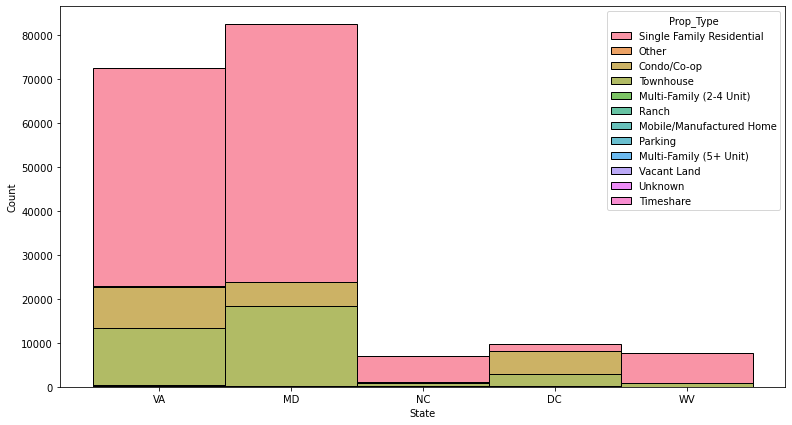

In [93]:
plt.figure(figsize=(13,7))
sns.histplot(categorical_df,x='State', stat='count', hue='Prop_Type', multiple='stack')

<AxesSubplot:xlabel='State', ylabel='PRICE'>

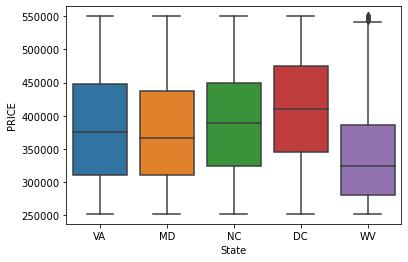

In [100]:
sns.boxplot(x=historical_filtered['State'], y=historical_filtered['PRICE'])

# (3) Maps

### Boundary Maps

In [24]:
import plotly.io as pio
import kaleido
pio.renderers.default = "browser"

In [38]:
fig = px.choropleth_mapbox(
        mapping_df, geojson=gdf, color="avg_pct_low_income",
        locations="GEOID", featureidkey="properties.GEOID",hover_name = "school_district_id",
        title='this is the title', opacity=0.7, zoom=3)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(coloraxis_colorbar=dict(title="Avg % Low Income"))
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [80]:
fig = px.choropleth_mapbox(
        mapping_df, geojson=gdf, color="avg_rating",
        locations="GEOID", featureidkey="properties.GEOID",hover_name = "school_district_id",
        opacity=0.7, zoom=3)

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(coloraxis_colorbar=dict(title="Avg Rating"))
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

## Scatterplots on map:
- scatter of SMH properties within a radius 
- scatter of current redfin listings with a radius
- ability to filter
- maybe filter on cluster

In [65]:
fig = (
    px.scatter_mapbox(
        historical,
        lat="LATITUDE",
        lon="LONGITUDE",
        color="STATUS", 
        size="PRICE", opacity=.80
    )
    .update_traces(marker={"size": 5})
    .update_layout(
        mapbox={
            "style": "open-street-map",
            "zoom": 5,
            "layers": [
                {
                    "source": json.loads(gdf.geometry.to_json()),
                    "below": "traces",
                    "type": "line",
                    "color": "Blue",
                    "line": {"width": 2},
                }
            ],
        },
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
    )
)
fig.show()

SyntaxError: invalid syntax (2857306543.py, line 4)

In [79]:
fig = (
    px.scatter_mapbox(
        historical[(historical['PRICE']>60000) & (historical['PRICE']<1000000)],
        lat="LATITUDE",
        lon="LONGITUDE",
        color="PRICE", 
        opacity=.70
    )
    .update_traces(marker={"size": 5})
    .update_layout(
        mapbox={
            "style": "open-street-map",
            "zoom": 5,
            "layers": [
                {
                    "source": json.loads(gdf.geometry.to_json()),
                    "below": "traces",
                    "type": "line",
                    "color": "Blue",
                    "line": {"width": 1.5},
                }
            ],
        },
        margin={"l": 0, "r": 0, "t": 0, "b": 0},
    )
)
fig.show()